## Import

In [186]:
import random
import pandas as pd
import numpy as np
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings(action='ignore') 

## Fixed Random-Seed

In [187]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

## Load Data

In [188]:
path = "/mnt/d/data/jeju"

train_df = pd.read_csv(os.path.join(path, './train.csv'))
test_df = pd.read_csv(os.path.join(path, './test.csv'))

## Data Pre-Processing

In [189]:
#시계열 특성을 학습에 반영하기 위해 timestamp를 월, 일, 시간으로 나눕니다
train_df['year'] = train_df['timestamp'].apply(lambda x : int(x[0:4]))
train_df['month'] = train_df['timestamp'].apply(lambda x : int(x[5:7]))
train_df['day'] = train_df['timestamp'].apply(lambda x : int(x[8:10]))

test_df['year'] = test_df['timestamp'].apply(lambda x : int(x[0:4]))
test_df['month'] = test_df['timestamp'].apply(lambda x : int(x[5:7]))
test_df['day'] = test_df['timestamp'].apply(lambda x : int(x[8:10]))

In [190]:
#학습에 사용하지 않을 변수들을 제거합니다
train_x = train_df.drop(columns=['ID', 'timestamp', 'supply(kg)', 'price(원/kg)'])
train_y = train_df['price(원/kg)']

test_x = test_df.drop(columns=['ID', 'timestamp'])

In [191]:
#질적 변수들을 수치화합니다
qual_col = ['item', 'corporation', 'location']
encoders = []

for i in qual_col:
    le = LabelEncoder()
    train_x[i]=le.fit_transform(train_x[i])
    encoders.append(le)
    test_x[i]=le.transform(test_x[i]) #test 데이터에 대해서 fit하는 것은 data leakage에 해당합니다

print('Done.')

Done.


In [192]:
import matplotlib.pyplot as plt

In [193]:
train_df[(train_df["price(원/kg)"]!=0) & (train_df["item"]=="TG")]

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5
6,TG_A_J_20190107,2019-01-07,TG,A,J,44995.0,1474.0,2019,1,7
7,TG_A_J_20190108,2019-01-08,TG,A,J,26975.0,1326.0,2019,1,8
...,...,...,...,...,...,...,...,...,...,...
15225,TG_E_S_20230227,2023-02-27,TG,E,S,24204.0,3418.0,2023,2,27
15226,TG_E_S_20230228,2023-02-28,TG,E,S,13587.0,3141.0,2023,2,28
15227,TG_E_S_20230301,2023-03-01,TG,E,S,16187.0,4235.0,2023,3,1
15228,TG_E_S_20230302,2023-03-02,TG,E,S,17830.0,3960.0,2023,3,2


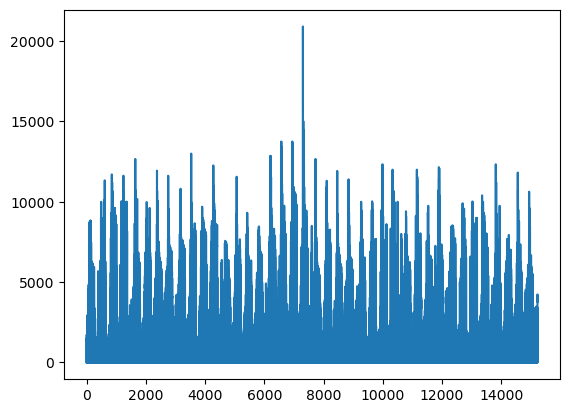

In [194]:
plt.plot(train_df[(train_df["item"]=="TG")]["price(원/kg)"])

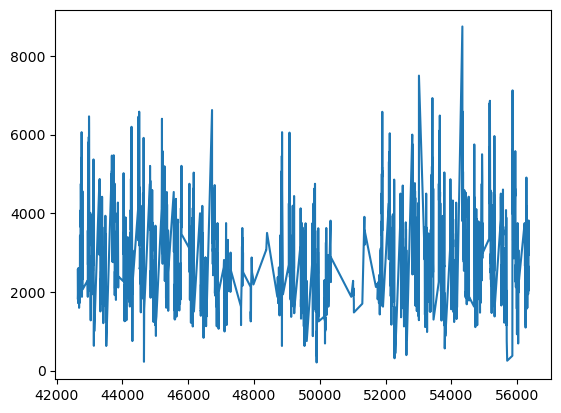

In [195]:
plt.plot(train_df[(train_df["price(원/kg)"]!=0) & (train_df["item"]=="BC")]["price(원/kg)"])

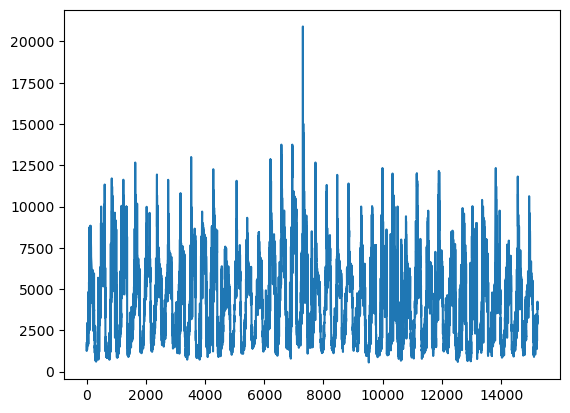

In [196]:
plt.plot(train_df[(train_df["price(원/kg)"]!=0) & (train_df["item"]=="TG")]["price(원/kg)"])

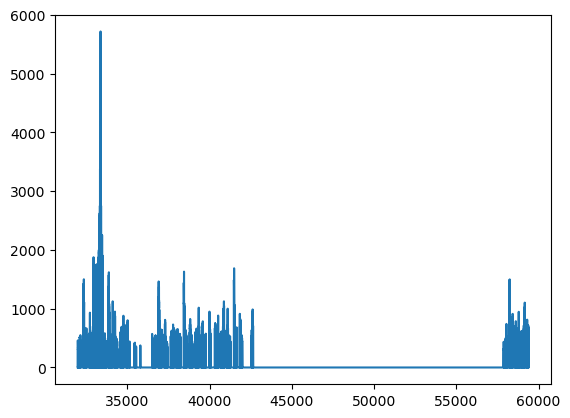

In [197]:
plt.plot(train_df[(train_df["item"]=="RD")]["price(원/kg)"])

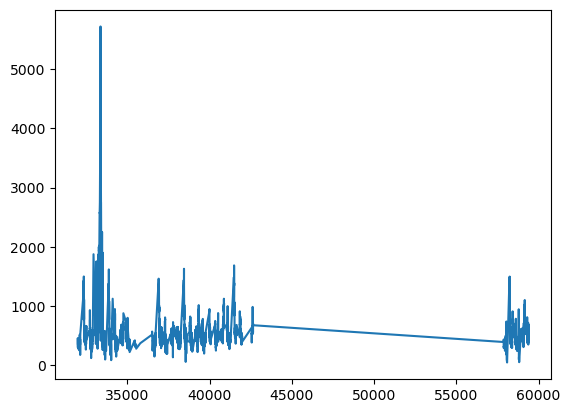

In [198]:
plt.plot(train_df[(train_df["price(원/kg)"]!=0) & (train_df["item"]=="RD")]["price(원/kg)"])

In [199]:
train_df

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019,1,1
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,2019,1,2
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5
...,...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2023,2,27
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2023,2,28
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,2023,3,1
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,2023,3,2


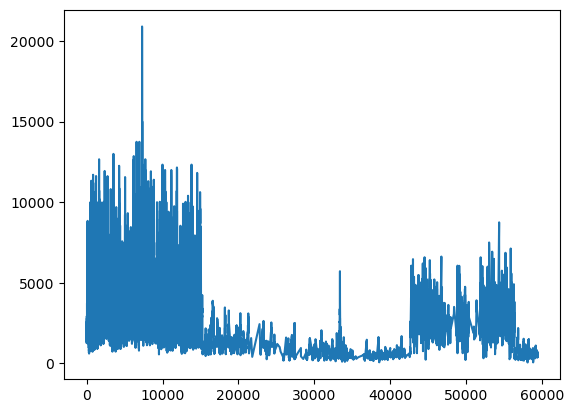

In [200]:
plt.plot(train_df[train_df["price(원/kg)"]!=0]["price(원/kg)"])

## Split data 

In [201]:
items = train_x["item"].unique()

In [202]:
# items
orders = encoders[0].inverse_transform(items)

In [203]:
dfs = []
ys = []
for index in items:
    dfs.append(train_x[train_x["item"]==index])
    ys.append(train_y[train_x["item"]==index])    

In [204]:
train_df

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,day
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0,2019,1,1
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0,2019,1,2
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0,2019,1,3
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0,2019,1,4
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0,2019,1,5
...,...,...,...,...,...,...,...,...,...,...
59392,RD_F_J_20230227,2023-02-27,RD,F,J,452440.0,468.0,2023,2,27
59393,RD_F_J_20230228,2023-02-28,RD,F,J,421980.0,531.0,2023,2,28
59394,RD_F_J_20230301,2023-03-01,RD,F,J,382980.0,574.0,2023,3,1
59395,RD_F_J_20230302,2023-03-02,RD,F,J,477220.0,523.0,2023,3,2


In [205]:
split_year = 2023
split_month = 2
train_xs = []
valid_xs = []
train_ys = []
valid_ys = []

for i in range(len(dfs)):
    df = dfs[i]
    y = ys[i]
    all_index = df.index
    valid_index = (df["year"] >= split_year) & (df["month"] >= split_month)
    train_xs.append(df[~valid_index])
    valid_xs.append(df[valid_index])
    train_ys.append(y[~valid_index])
    valid_ys.append(y[valid_index])

In [206]:
valid_index = (train_x["year"] >= split_year) & (train_x["month"] >= split_month)
train_x_ = train_x[~valid_index]
train_y_ = train_y[~valid_index]
valid_x = train_x[valid_index]
valid_y = train_y[valid_index]

In [209]:
model = RandomForestRegressor()
model.fit(train_x_, train_y_)
pred = model.predict(valid_x)
mean_squared_error(valid_y, pred)**0.5

1226.2715437186662

In [211]:
preds = model.predict(test_x)
submission = pd.read_csv(os.path.join(path, './sample_submission.csv'))
submission
submission['answer'] = preds
submission

,ID,answer
0,TG_A_J_20230304,3697.36
1,TG_A_J_20230305,4197.21
2,TG_A_J_20230306,190.31
3,TG_A_J_20230307,3108.30
4,TG_A_J_20230308,3088.01
...,...,...
1087,RD_F_J_20230327,117.02
1088,RD_F_J_20230328,422.89
1089,RD_F_J_20230329,367.53
1090,RD_F_J_20230330,394.79


In [212]:
submission.to_csv('./baseline_submission.csv', index=False)

In [137]:
# for t in trains:
#     print(f"len of train {t['item'].iloc[0]}: {len(t)}")

In [138]:
# for t in valids:
#     print(f"len of valid {t['item'].iloc[0]}: {len(t)}")

## Fit Regression models

In [139]:
train_y

0           0.0
1           0.0
2        1728.0
3        1408.0
4        1250.0
          ...  
59392     468.0
59393     531.0
59394     574.0
59395     523.0
59396     529.0
Name: price(원/kg), Length: 59397, dtype: float64

In [140]:
models = []
for i in range(len(train_xs)):
    model = RandomForestRegressor()
    model.fit(train_xs[i], train_ys[i])
    models.append(model)

In [141]:
from sklearn.metrics import mean_squared_error

In [142]:
scores = []
for i in range(len(models)):
    pred = models[i].predict(valid_xs[i])
    score = mean_squared_error(valid_ys[i], pred)**0.5
    scores.append(score)

In [143]:
score

1125.1993135626842

In [144]:
scores

[1853.0934882354547,
 1239.3531712942986,
 606.3320983245978,
 359.18546956407874,
 1125.1993135626842]

In [145]:
np.array(scores).mean()

1036.632708196223

In [146]:
orders

array(['TG', 'CR', 'CB', 'RD', 'BC'], dtype=object)

In [147]:
items

array([4, 2, 1, 3, 0])

In [148]:
preds = test_x["day"]

In [149]:
for i in range(len(items)):
    index = test_x["item"]==items[i]
    preds[index] = models[i].predict(test_x[index])

## Submission 

In [152]:
submission = pd.read_csv(os.path.join(path, './sample_submission.csv'))
submission

,ID,answer
0,TG_A_J_20230304,0
1,TG_A_J_20230305,0
2,TG_A_J_20230306,0
3,TG_A_J_20230307,0
4,TG_A_J_20230308,0
...,...,...
1087,RD_F_J_20230327,0
1088,RD_F_J_20230328,0
1089,RD_F_J_20230329,0
1090,RD_F_J_20230330,0


In [153]:
submission['answer'] = preds
submission

,ID,answer
0,TG_A_J_20230304,3758.11
1,TG_A_J_20230305,4275.07
2,TG_A_J_20230306,79.65
3,TG_A_J_20230307,3125.59
4,TG_A_J_20230308,3136.91
...,...,...
1087,RD_F_J_20230327,344.22
1088,RD_F_J_20230328,392.72
1089,RD_F_J_20230329,233.00
1090,RD_F_J_20230330,428.44


In [154]:
submission.to_csv('./baseline_submission.csv', index=False)